In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy import stats

In [46]:
data_table = pd.read_csv('Skyserver_SQL5_29_2019 10_48_08 PM.csv')
selected_data = data_table[::90]

In [47]:
mask = ((data_table['ra'] - 132.825)**2 + (data_table['dec'] - 11.8)**2)**(1/2) < 0.25
mask2 = ((data_table['ra'] - 132.825)**2 + (data_table['dec'] - 11.8)**2)**(1/2) > 0.25

In [48]:
selected_data[mask]

/astro/classes/Astro_300/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


ra        dec         u         g         r         i         z
2070   132.643268  11.665751  15.10178  13.24730  12.58525  12.47796  13.53120
2430   132.607313  11.718658  23.31516  22.94193  23.24112  23.01876  23.27229
2520   132.624797  11.864419  23.81509  22.19814  20.59249  19.45802  18.76986
2610   132.696459  11.875799  18.43206  16.53108  15.83943  15.59776  15.50282
2700   132.791286  11.771354  16.22553  14.85553  14.36615  14.19923  14.16234
2790   132.703601  11.771032  24.88434  23.76417  22.35501  22.18192  21.98526
2880   132.678940  11.813862  23.69503  21.99306  20.93673  20.62760  20.63617
2970   132.684258  11.795583  22.79234  22.76678  21.68866  21.37148  21.24302
3060   132.764174  11.821695  25.34350  23.68344  24.01833  21.48571  20.48079
3150   132.861303  11.936682  18.55484  16.43616  15.49207  15.12001  14.89382
4050   132.688051  11.867872  24.19981  23.90320  23.25805  21.82632  21.69895
4140   132.840172  11.927100  23.43227  21.80801  21.31204  21.01865  20.75459
4230   132.992507  11.766412  26.68955  23.78098  22.35746  21.38510  20.76515
4320   133.013309  11.963990  24.00878  23.75635  21.50036  20.76832  20.28018
4410   132.991832  11.972914  20.65569  18.05324  16.70187  16.11564  15.77722
4500   132.991388  11.945241  25.43430  21.70350  20.15375  18.80451  18.04666
4590   133.019102  11.893525  26.37579  22.49894  21.25102  20.56614  19.78826
9540   133.018767  11.951901  24.35933  21.75430  21.07671  20.43246  19.83624
9720   132.961836  11.992761  24.99119  23.60222  22.59858  22.16424  21.42401
10080  132.699678  11.905115  21.17957  20.25521  20.01220  19.85137  19.90955
10170  132.743043  11.858433  26.23369  22.46912  20.39142  19.56069  18.98384
10260  132.731141  11.891932  23.34902  23.14245  22.07912  22.05581  21.80411
10530  132.704029  11.948797  25.52522  24.19417  24.01607  21.72887  20.40937
10620  132.867599  11.955807  24.42089  21.77755  20.30991  19.27517  18.72573
10800  132.902672  12.013663  21.56819  19.07245  18.07855  17.68860  17.46534
11160  132.807302  12.003152  24.48742  22.42912  21.34911  21.09461  20.37429
11250  132.809268  12.007309  26.17444  23.98007  22.08732  21.43209  21.20547
11430  132.909609  11.954751  25.49722  23.07566  22.42425  21.31212  21.08858
11520  132.982946  11.907888  26.21031  23.02836  22.28952  21.14050  22.08898
11700  133.049929  11.895592  24.68434  23.43359  22.50055  21.90963  21.67336
...           ...        ...       ...       ...       ...       ...       ...
44280  132.690966  11.911615  19.86769  17.40728  16.29516  15.83102  15.59162
44370  132.756423  11.826176  14.78003  13.12298  14.58324  15.15318  13.00431
44910  132.831671  11.634979  22.72995  20.63167  19.29526  18.76892  18.44775
45450  132.761574  11.857061  16.68636  14.95292  14.31647  14.05591  13.95468
45540  132.775881  11.631717  20.54754  20.40803  20.34485  19.99321  20.10487
45630  132.756151  11.604263  22.51085  22.37136  22.31109  21.61354  20.73338
45900  132.757015  11.578811  23.60785  21.96544  20.37709  19.55802  19.10760
46350  132.817468  11.698898  23.20572  21.31475  20.27169  19.95878  19.75309
46440  132.624721  11.676689  22.26455  22.59924  21.35616  21.09488  21.23346
46980  132.789848  11.582175  24.09760  23.63337  22.23339  22.67212  21.88633
47160  132.614526  11.671239  24.95345  24.40918  22.26181  21.16066  19.64284
47430  132.739056  11.984809  20.63252  18.99953  18.36359  18.07914  18.01820
47520  132.757857  11.944543  21.85851  19.91193  19.12765  18.82797  18.62496
47610  133.014653  11.739628  24.84530  20.56637  19.25366  18.20815  17.63180
47970  133.002728  11.649682  26.39845  21.64955  20.49179  20.22463  19.91246
48060  132.766114  11.625902  23.66838  23.64792  23.10330  22.32879  22.28810
48240  132.827015  11.557878  23.00285  22.92215  21.84437  21.06041  20.88277
48330  132.803605  11.562157  24.30722  23.90790  22.32436  21.01283  20.35077
48420  132.900454  11.577939  22.48456  22.42549  21.42391  20.95

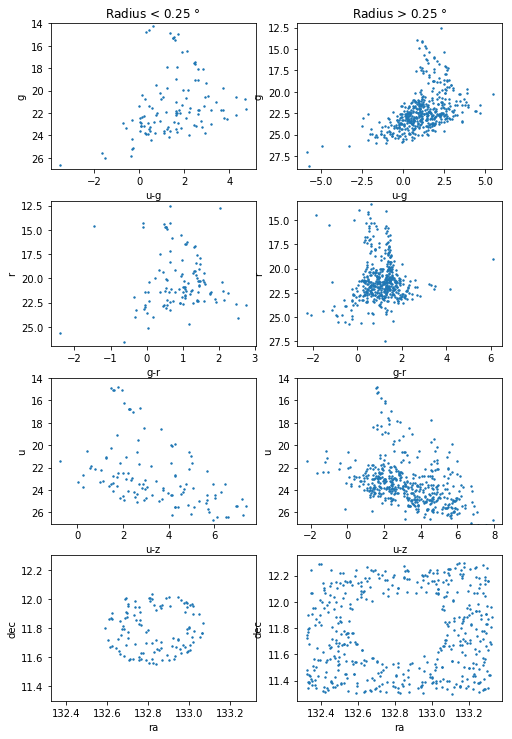

In [103]:
fig,ax = plt.subplots(4,2)
fig.set_size_inches(7,10)
fig.tight_layout()

x1 = selected_data['u'][mask] - selected_data['g'][mask]
y1 = selected_data['g'][mask]

ax[0,0].set_title(r'Radius < 0.25 $\degree$')
ax[0,0].set_ylim(27,14)
ax[0,0].set_xlabel('u-g')
ax[0,0].set_ylabel('g')
ax[0,0].scatter(x1,y1,s=2)


x2 = selected_data['u'][mask2] - selected_data['g'][mask2]
y2 = selected_data['g'][mask2]

ax[0,1].set_title(r'Radius > 0.25 $\degree$')
ax[0,1].set_ylim(29,12)
ax[0,1].set_xlabel('u-g')
ax[0,1].set_ylabel('g')
ax[0,1].scatter(x2,y2,s=2)


x3 = selected_data['g'][mask] - selected_data['r'][mask]
y3 = selected_data['r'][mask]

ax[1,0].set_ylim(27,12)
ax[1,0].set_xlabel('g-r')
ax[1,0].set_ylabel('r')
ax[1,0].scatter(x3,y3,s=2)


x4 = selected_data['g'][mask2] - selected_data['r'][mask2]
y4 = selected_data['r'][mask2]

ax[1,1].set_ylim(28,13)
ax[1,1].set_xlabel('g-r')
ax[1,1].set_ylabel('r')
ax[1,1].scatter(x4,y4,s=2)


x5 = selected_data['u'][mask] - selected_data['z'][mask]
y5 = selected_data['u'][mask]

ax[2,0].set_ylim(27,14)
ax[2,0].set_xlabel('u-z')
ax[2,0].set_ylabel('u')
ax[2,0].scatter(x5,y5,s=2)


x6 = selected_data['u'][mask2] - selected_data['z'][mask2]
y6 = selected_data['u'][mask2]

ax[2,1].set_ylim(27,14)
ax[2,1].set_xlabel('u-z')
ax[2,1].set_ylabel('u')
ax[2,1].scatter(x6,y6,s=2)


x7 = selected_data['ra'][mask]
y7 = selected_data['dec'][mask]

ax[3,0].set_xlim(132.325,133.325)
ax[3,0].set_ylim(11.3,12.3)
ax[3,0].set_xlabel('ra')
ax[3,0].set_ylabel('dec')
ax[3,0].scatter(x7,y7,s=2)


x8 = selected_data['ra'][mask2]
y8 = selected_data['dec'][mask2]


ax[3,1].set_xlabel('ra')
ax[3,1].set_ylabel('dec')
ax[3,1].scatter(x8,y8,s=2)
fig.savefig('Plots.png')

In [110]:
goodpoint = data_table['g'] - data_table['r'] <20

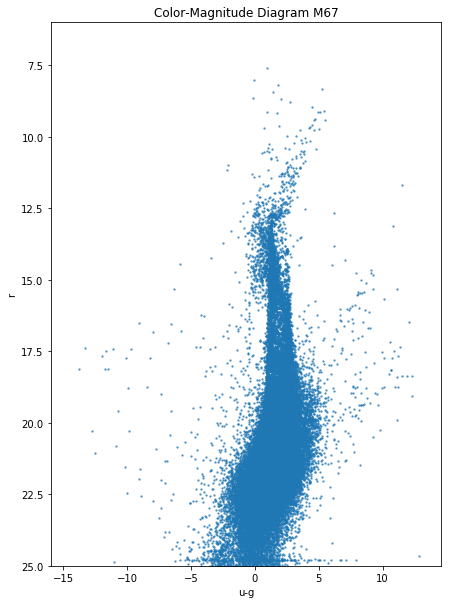

In [199]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,10)


xnew = data_table['u'][goodpoint] - data_table['g'][goodpoint]
ynew = data_table['r'][goodpoint]

ax.set_title('Color-Magnitude Diagram M67')

ax.set_xlabel('u-g')
ax.set_ylabel('r')
ax.set_ylim(6,25)
ax.scatter(xnew,ynew,s=2,alpha=.6)
ax.invert_yaxis()
fig.savefig('Colormag.png')

In [245]:
new_data_table = pd.read_csv('MAST_Crossmatch_SDSS.csv')
xfinal = new_data_table['s_ra']
yfinal = new_data_table['s_dec']

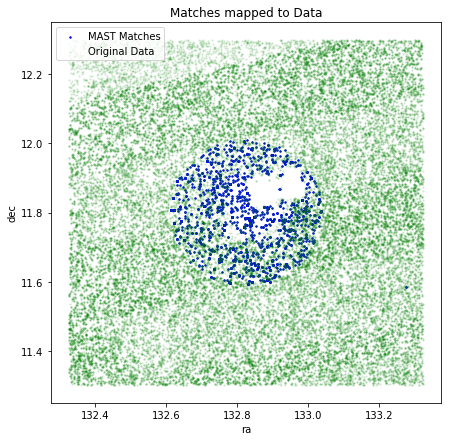

In [258]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(7,7)

ax.scatter(xfinal,yfinal,c='b',s=2,alpha=1,label = 'MAST Matches')
ax.scatter(data_table['ra'],data_table['dec'] ,c='g',s=2,alpha=.1, label = "Original Data")

ax.legend()
ax.set_title('Matches mapped to Data')
ax.set_xlabel('ra')
ax.set_ylabel('dec')
fig.savefig('matches.png')

In [263]:
u=new_data_table['petroMag_u']
g=new_data_table['petroMag_g']
r=new_data_table['petroMag_r']
i=new_data_table['petroMag_i']
z=new_data_table['petroMag_z']

ra        dec         u         g         r         i         z
0      132.663680  11.331896  22.69184  21.89044  20.13617  19.48577  18.98562
1      132.648853  11.387937  24.69102  21.98243  20.46815  19.52488  18.99304
2      132.650860  11.380749  23.72783  22.37502  20.73017  20.28893  20.07841
3      132.658562  11.353289  24.89026  22.20214  20.61699  19.93638  19.55150
4      132.638283  11.432196  25.68492  22.30326  21.98758  21.85401  21.38968
5      132.663698  11.344905  22.84528  21.85568  20.91455  20.74275  20.04745
6      132.657583  11.373112  24.07777  22.68202  22.64470  21.99919  21.10405
7      132.656159  11.373362  24.14071  24.06566  22.31160  23.90554  22.41213
8      132.673463  11.318909  24.03267  22.31848  20.91753  19.71948  19.12688
9      132.645742  11.416792  23.03909  22.49393  22.70432  21.95991  21.40846
10     132.678576  11.307692  22.07115  21.88259  20.69135  20.47668  19.80020
11     132.674766  11.321012  23.54122  22.31322  21.09574  19.74245  19.10706
12     132.676636  11.322266  24.88820  22.24588  20.56834  19.78514  19.29483
13     132.674838  11.324845  22.65914  22.17012  21.16137  20.88718  21.18572
14     132.651387  11.409523  25.05213  21.92095  20.52526  19.43826  18.98048
15     132.653155  11.404667  26.02815  22.61902  21.18399  19.65345  18.90977
16     132.671677  11.344956  22.12782  21.26691  20.13785  19.71295  19.50534
17     132.655289  11.409647  24.16101  22.80611  21.16853  20.11212  19.46647
18     132.671522  11.362046  25.84319  22.39324  21.25646  21.09387  21.49688
19     132.653513  11.424910  22.53335  22.27489  22.05742  21.52073  22.10539
20     132.672055  11.364515  22.36927  21.31724  20.02315  19.43847  18.98456
21     132.653273  11.430645  24.18983  22.49360  21.40474  21.05142  20.68854
22     132.677695  11.348231  21.97255  20.71746  20.55213  20.18903  20.15467
23     132.690506  11.304378  23.44524  22.84404  22.74119  23.06671  22.89702
24     132.666698  11.390463  22.17628  21.46349  21.14451  21.06410  21.12544
25     132.659981  11.413005  23.03280  22.75032  21.64175  21.10161  20.53288
26     132.653106  11.440034  22.89343  21.72440  20.49177  19.96601  19.55742
27     132.654815  11.441476  23.70011  21.86397  21.40119  21.06172  21.27648
28     132.652187  11.438267  24.69558  22.16522  21.72200  21.34821  21.63847
29     132.693316  11.304604  22.57450  22.53797  21.38951  21.25230  21.16982
...           ...        ...       ...       ...       ...       ...       ...
52605  133.314271  12.053345  23.96348  23.01304  21.89459  21.68114  20.38715
52606  133.317103  12.055939  25.39528  23.39015  22.35639  21.64965  20.60170
52607  133.323948  12.045245  23.86150  23.36180  22.06177  21.43729  20.37832
52608  133.257585  12.004520  24.25653  25.04759  22.99806  21.49256  20.58603
52609  133.279031  11.931547  23.81713  24.68678  23.37317  21.36585  20.38288
52610  133.269839  11.966125  24.02178  25.07296  23.04495  21.45011  20.27546
52611  133.251989  12.032196  23.79680  24.76734  23.12157  22.02222  21.05904
52612  133.277637  11.951532  22.72330  24.92865  24.71249  21.08366  19.63241
52613  133.289307  11.919378  24.84610  24.85571  25.65118  22.06468  22.76342
52614  133.307002  11.865084  25.39421  24.62500  23.39088  21.78941  21.69424
52615  133.265908  12.015785  24.86188  24.76632  22.81893  21.30507  20.16952
52616  133.308616  11.901019  25.91340  24.11831  22.68106  21.68595  21.44354
52617  133.313679  11.885057  25.71597  25.17152  23.16830  21.71931  21.23599
52618  133.281133  12.008732  23.96408  24.10091  23.25686  20.95160  20.14536
52619  133.296486  11.962846  25.80315  23.45449  22.44298  21.79272  21.53056
52620  133.314620  11.905383  25.29450  23.44402  23.01989  22.04261  21.32644
52621  133.284130  12.012242  26.65292  23.99317  22.18037  21.12383  20.41775
52622  133.308796  11.940944  24.91633  23.75648  22.81062  21.99765  21.83790
52623  133.299448  11.974835  24.32062  24.11423  22.78558  21.80

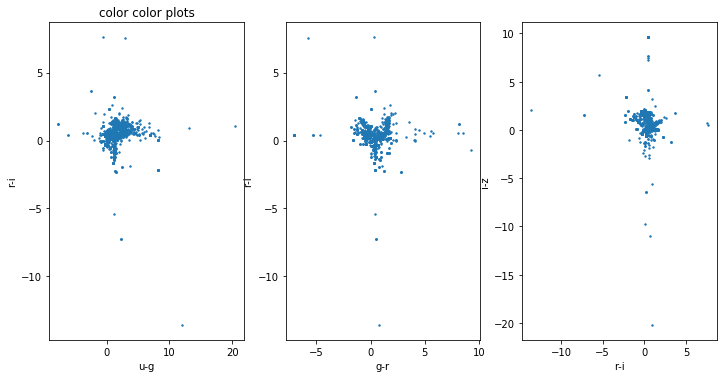

In [266]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(10,5)
fig.tight_layout()

x1 = u - g
y1 = r-i

ax[0].set_title('color color plots')
#ax[0].set_ylim(27,14)
ax[0].set_xlabel('u-g')
ax[0].set_ylabel('r-i')
ax[0].scatter(x1,y1,s=2)


x3 = g - r
y3 = r-i

#ax[1].set_ylim(27,12)
ax[1].set_xlabel('g-r')
ax[1].set_ylabel('r-i')
ax[1].scatter(x3,y3,s=2)



x5 = r-i
y5 = i-z

#ax[2].set_ylim(27,14)
ax[2].set_xlabel('r-i')
ax[2].set_ylabel('i-z')
ax[2].scatter(x5,y5,s=2)



fig.savefig('Plots2.png')